In [2]:
%matplotlib inline

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [5]:
mnist.train.images.shape

(55000, 784)

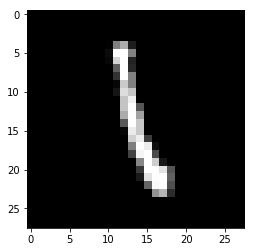

In [36]:
plt.imshow(Image.fromarray((mnist.train.images[1] * 255).astype(np.uint8).reshape([28, 28])))

In [37]:
# plt.imshow(Image.fromarray(mnist.train.images[0].reshape([28, 28])))

In [38]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [8]:
#使用小批量
batch_images, batch_labels = mnist.train.next_batch(32)

In [9]:
batch_images.shape

(32, 784)

In [26]:
with tf.Graph().as_default() as g:
    inputs = tf.placeholder(
        shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(
        shape=[None, 10], dtype=tf.float32)
    
    out_weight = tf.Variable(
        tf.random_normal([784, 10]))
    out_bias = tf.Variable(tf.zeros([10, ]))
    
    logits = tf.matmul(inputs, out_weight) + out_bias
    
    output = tf.nn.softmax(logits) # [none, 10]
    
    loss = tf.reduce_mean(
        -tf.reduce_sum(
            labels * tf.log(output + 1e-17), axis=1))
    
    acc = tf.reduce_mean(tf.cast(
        tf.equal(tf.argmax(output, axis=1),
                 tf.argmax(labels, axis=1)), tf.float32))
    
    optim = tf.train.GradientDescentOptimizer(
        learning_rate=0.01)
    train_op = optim.minimize(loss)

In [51]:
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10000):  # 训练次数
        batch_images, batch_labels = mnist.train.next_batch(32)
        res_loss, _ = sess.run(
            [loss, train_op], 
            feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        if step % 500 == 0:
            accs = []
            for j in range(10000 // 32):
                batch_images, batch_labels = mnist.test.next_batch(32)
                res_acc = sess.run(
                    acc,
                    feed_dict={
                        inputs: batch_images,
                        labels: batch_labels
                    })
                accs.append(res_acc)

            m_acc = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, m_acc))

step     0, loss 15.9256, acc 0.0802
step   500, loss 5.3623, acc 0.2371
step  1000, loss 4.5779, acc 0.4014
step  1500, loss 2.7865, acc 0.5046
step  2000, loss 2.2100, acc 0.5728
step  2500, loss 1.9900, acc 0.6250
step  3000, loss 2.0538, acc 0.6600
step  3500, loss 1.2781, acc 0.6965
step  4000, loss 1.1578, acc 0.7069
step  4500, loss 1.2189, acc 0.7243
step  5000, loss 1.4226, acc 0.7413
step  5500, loss 1.3907, acc 0.7510
step  6000, loss 2.2092, acc 0.7650
step  6500, loss 0.8933, acc 0.7685
step  7000, loss 2.3060, acc 0.7754
step  7500, loss 0.9287, acc 0.7887
step  8000, loss 1.7200, acc 0.7873
step  8500, loss 0.6559, acc 0.7942
step  9000, loss 0.6806, acc 0.7972
step  9500, loss 1.4256, acc 0.8069
step 10000, loss 0.9596, acc 0.8049
step 10500, loss 0.6836, acc 0.8120
step 11000, loss 0.8711, acc 0.8119
step 11500, loss 0.7327, acc 0.8164
step 12000, loss 1.2368, acc 0.8164
step 12500, loss 1.6132, acc 0.8194
step 13000, loss 0.7434, acc 0.8209
step 13500, loss 0.7248, ac

step 113500, loss 0.1319, acc 0.8975
step 114000, loss 0.6900, acc 0.8995
step 114500, loss 0.3463, acc 0.8975
step 115000, loss 0.5804, acc 0.8978
step 115500, loss 0.7298, acc 0.8958
step 116000, loss 0.3478, acc 0.8988
step 116500, loss 0.4462, acc 0.9005
step 117000, loss 0.4412, acc 0.8940
step 117500, loss 0.6107, acc 0.8992
step 118000, loss 0.0693, acc 0.8945
step 118500, loss 0.0563, acc 0.9036
step 119000, loss 0.3536, acc 0.8935
step 119500, loss 0.3768, acc 0.9012
step 120000, loss 0.0849, acc 0.8963
step 120500, loss 0.2032, acc 0.9030
step 121000, loss 0.4888, acc 0.8930
step 121500, loss 0.2378, acc 0.8985
step 122000, loss 0.2202, acc 0.9004
step 122500, loss 0.4702, acc 0.8958
step 123000, loss 0.1154, acc 0.9011
step 123500, loss 0.5730, acc 0.9014
step 124000, loss 0.2403, acc 0.8962
step 124500, loss 0.4531, acc 0.9009
step 125000, loss 0.4574, acc 0.8958
step 125500, loss 0.6965, acc 0.9015
step 126000, loss 0.1064, acc 0.9013
step 126500, loss 0.6285, acc 0.8980
s